In [85]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3
import re
import math
from v_finite_polygons import voronoi_finite_polygons_2d
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon, Patch
import matplotlib.image as mpimg
from matplotlib.ticker import ScalarFormatter

In [86]:
InteriorSensors = {
    'S-01':[3.5,5],
    'S-02':[2,5],
    'S-03':[3.5,6.5],
    'S-04':[3.5,5.1],
    'S-05':[3.5,3.5],
    'S-06':[5,5],
    'S-07':[1,9.9],
    'S-08':[1,10],
    'S-09':[10-.1,10],
    'S-10':[10,10],
    'S-11':[10,1.1],
    'S-12':[10,1],
    'S-13':[1,1.1],
    'S-15':[1,1],
}

In [87]:
ZoneAssignments = pd.read_csv('./dataInfo/ZoneAssignments.csv')
key = list(ZoneAssignments.keys())[0]
numZones = len(set(ZoneAssignments[key]))

In [88]:
allFiles = glob.glob("./interpolatedData/*.csv")
print(allFiles)

['./interpolatedData\\S-01.csv', './interpolatedData\\S-02.csv', './interpolatedData\\S-03.csv', './interpolatedData\\S-04.csv', './interpolatedData\\S-05.csv', './interpolatedData\\S-06.csv', './interpolatedData\\S-07.csv', './interpolatedData\\S-08.csv', './interpolatedData\\S-09.csv', './interpolatedData\\S-10.csv', './interpolatedData\\S-11.csv', './interpolatedData\\S-12.csv', './interpolatedData\\S-13.csv', './interpolatedData\\S-14.csv', './interpolatedData\\S-15.csv', './interpolatedData\\S-16.csv', './interpolatedData\\S-18.csv', './interpolatedData\\S-19.csv']


In [89]:
avgData = glob.glob("./stretchedAvgData/*.csv")
print(avgData)

['./stretchedAvgData\\OR 12 Blocked.csv', './stretchedAvgData\\OR 12 Unblocked.csv', './stretchedAvgData\\OR 5 Blocked.csv', './stretchedAvgData\\OR 5 Unblocked.csv']


In [90]:
expData = glob.glob("./stretchedExpirementData/*.csv")
print(expData)

['./stretchedExpirementData\\OR 12 Blocked Exp 1.csv', './stretchedExpirementData\\OR 12 Blocked Exp 2.csv', './stretchedExpirementData\\OR 12 Blocked Exp 3.csv', './stretchedExpirementData\\OR 12 Unblocked Exp 1.csv', './stretchedExpirementData\\OR 12 Unblocked Exp 2.csv', './stretchedExpirementData\\OR 12 Unblocked Exp 3.csv', './stretchedExpirementData\\OR 5 Blocked Exp 1.csv', './stretchedExpirementData\\OR 5 Blocked Exp 2.csv', './stretchedExpirementData\\OR 5 Blocked Exp 3.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 1.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 2.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 3.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 4.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 5.csv', './stretchedExpirementData\\OR 5 Unblocked Exp 6.csv']


In [91]:
df = {}
for x in allFiles:
    name = x.split('\\')[1].split('.')[0]
    df[name] = pd.read_csv(x,parse_dates=[0])

In [92]:
mergedData = pd.read_csv('./mergedData/mergedFrame.csv',parse_dates=[0])

In [93]:
stAvgDf = {}
for x in avgData:
    name = x.split('\\')[1].split('.')[0]
    stAvgDf[name] = pd.read_csv(x)

In [94]:
stExpDf = {}
for x in expData:
    name = x.split('\\')[1].split('.')[0]
    stExpDf[name] = pd.read_csv(x)


Text(0.5, 1.0, 'Variance in Particles')

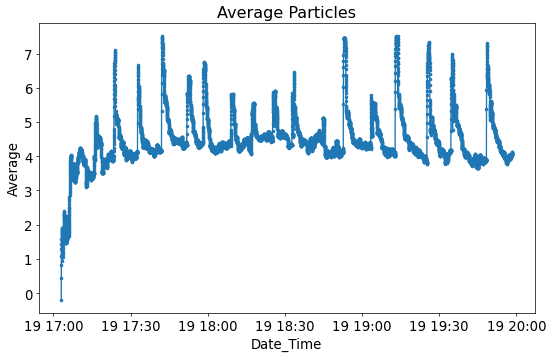

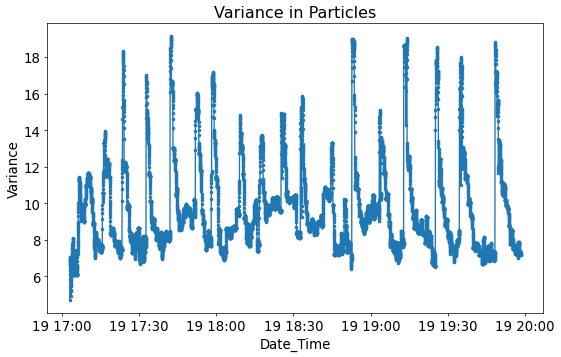

In [95]:
split = len(mergedData)

fig = plt.figure(0, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Average'][:split])/np.log(3),'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Average')
plt.title('Average Particles')

fig = plt.figure(2, figsize=(10,6), dpi=64)
ax = fig.gca()
ax.plot(mergedData['Date_Time'][:split],np.log(mergedData['Variance'])[:split],'.-')
ax.set_xlabel(mergedData.columns[0])
ax.set_ylabel('Variance')
plt.title('Variance in Particles')

# fig = plt.figure(1, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Average'][split:])/np.log(3),'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Average')
# plt.title('Average Particles')

# fig = plt.figure(4, figsize=(10,6), dpi=64)
# ax = fig.gca()
# ax.plot(mergedData['Date_Time'][split:],np.log(mergedData['Variance'])[split:],'.-')
# ax.set_xlabel(mergedData.columns[0])
# ax.set_ylabel('Variance')
# plt.title('Variance in Particles')

In [96]:
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)

color = tableau20

### All Sensors Plotted

In [97]:
mergedData

Date_Time   S-01   S-02  S-03  S-04  S-05  S-06   S-07   S-08  \
0     2021-04-19 17:00:00    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1     2021-04-19 17:00:01    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2     2021-04-19 17:00:02    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3     2021-04-19 17:00:03    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4     2021-04-19 17:00:04    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
...                   ...    ...    ...   ...   ...   ...   ...    ...    ...   
10696 2021-04-19 19:58:16  147.6  104.4  85.2  49.2  73.2  87.6  113.4  129.0   
10697 2021-04-19 19:58:17  146.7  112.8  80.4  47.4  71.4  88.2  114.3  129.0   
10698 2021-04-19 19:58:18  145.8  121.2  75.6  45.6  69.6  88.8  115.2  129.0   
10699 2021-04-19 19:58:19  144.9  129.6  70.8  43.8  67.8  89.4  116.1  129.0   
10700 2021-04-19 19:58:20  144.0  138.0  66.0  42.0  66.0  90.0  117.0  129.0   

        S-09  ...  S-11   S-12   S-13   S-14  S-15  S-16  S-18  S-19  \
0        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
1        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
2        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
3        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
4        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
...      ...  ...   ...    ...    ...    ...   ...   ...   ...   ...   
10696  121.6  ...  70.8  116.8  152.8  104.4  54.6  63.6  37.8  66.0   
10697  128.7  ...  69.1  116.1  152.1  100.8  53.7  65.7  44.1  69.0   
10698  135.8  ...  67.4  115.4  151.4   97.2  52.8  67.8  50.4  72.0   
10699  142.9  ...  65.7  114.7  150.7   93.6  51.9  69.9  56.7  75.0   
10700  150.0  ...  64.0  114.0  150.0   90.0  51.0  72.0  63.0  78.0   

         Average     Variance  
0       0.000000     0.000000  
1       0.000000     0.000000  
2       0.000000     0.000000  
3       0.000000     0.000000  
4       0.000000     0.000000  
...          ...          ...  
10696  90.500000  1430.787037  
10697  91.138889  1398.770062  
10698  91.777778  1366.753086  
10699  92.416667  1334.736111  
10700  93.055556  1302.719136  

[10701 rows x 21 columns]

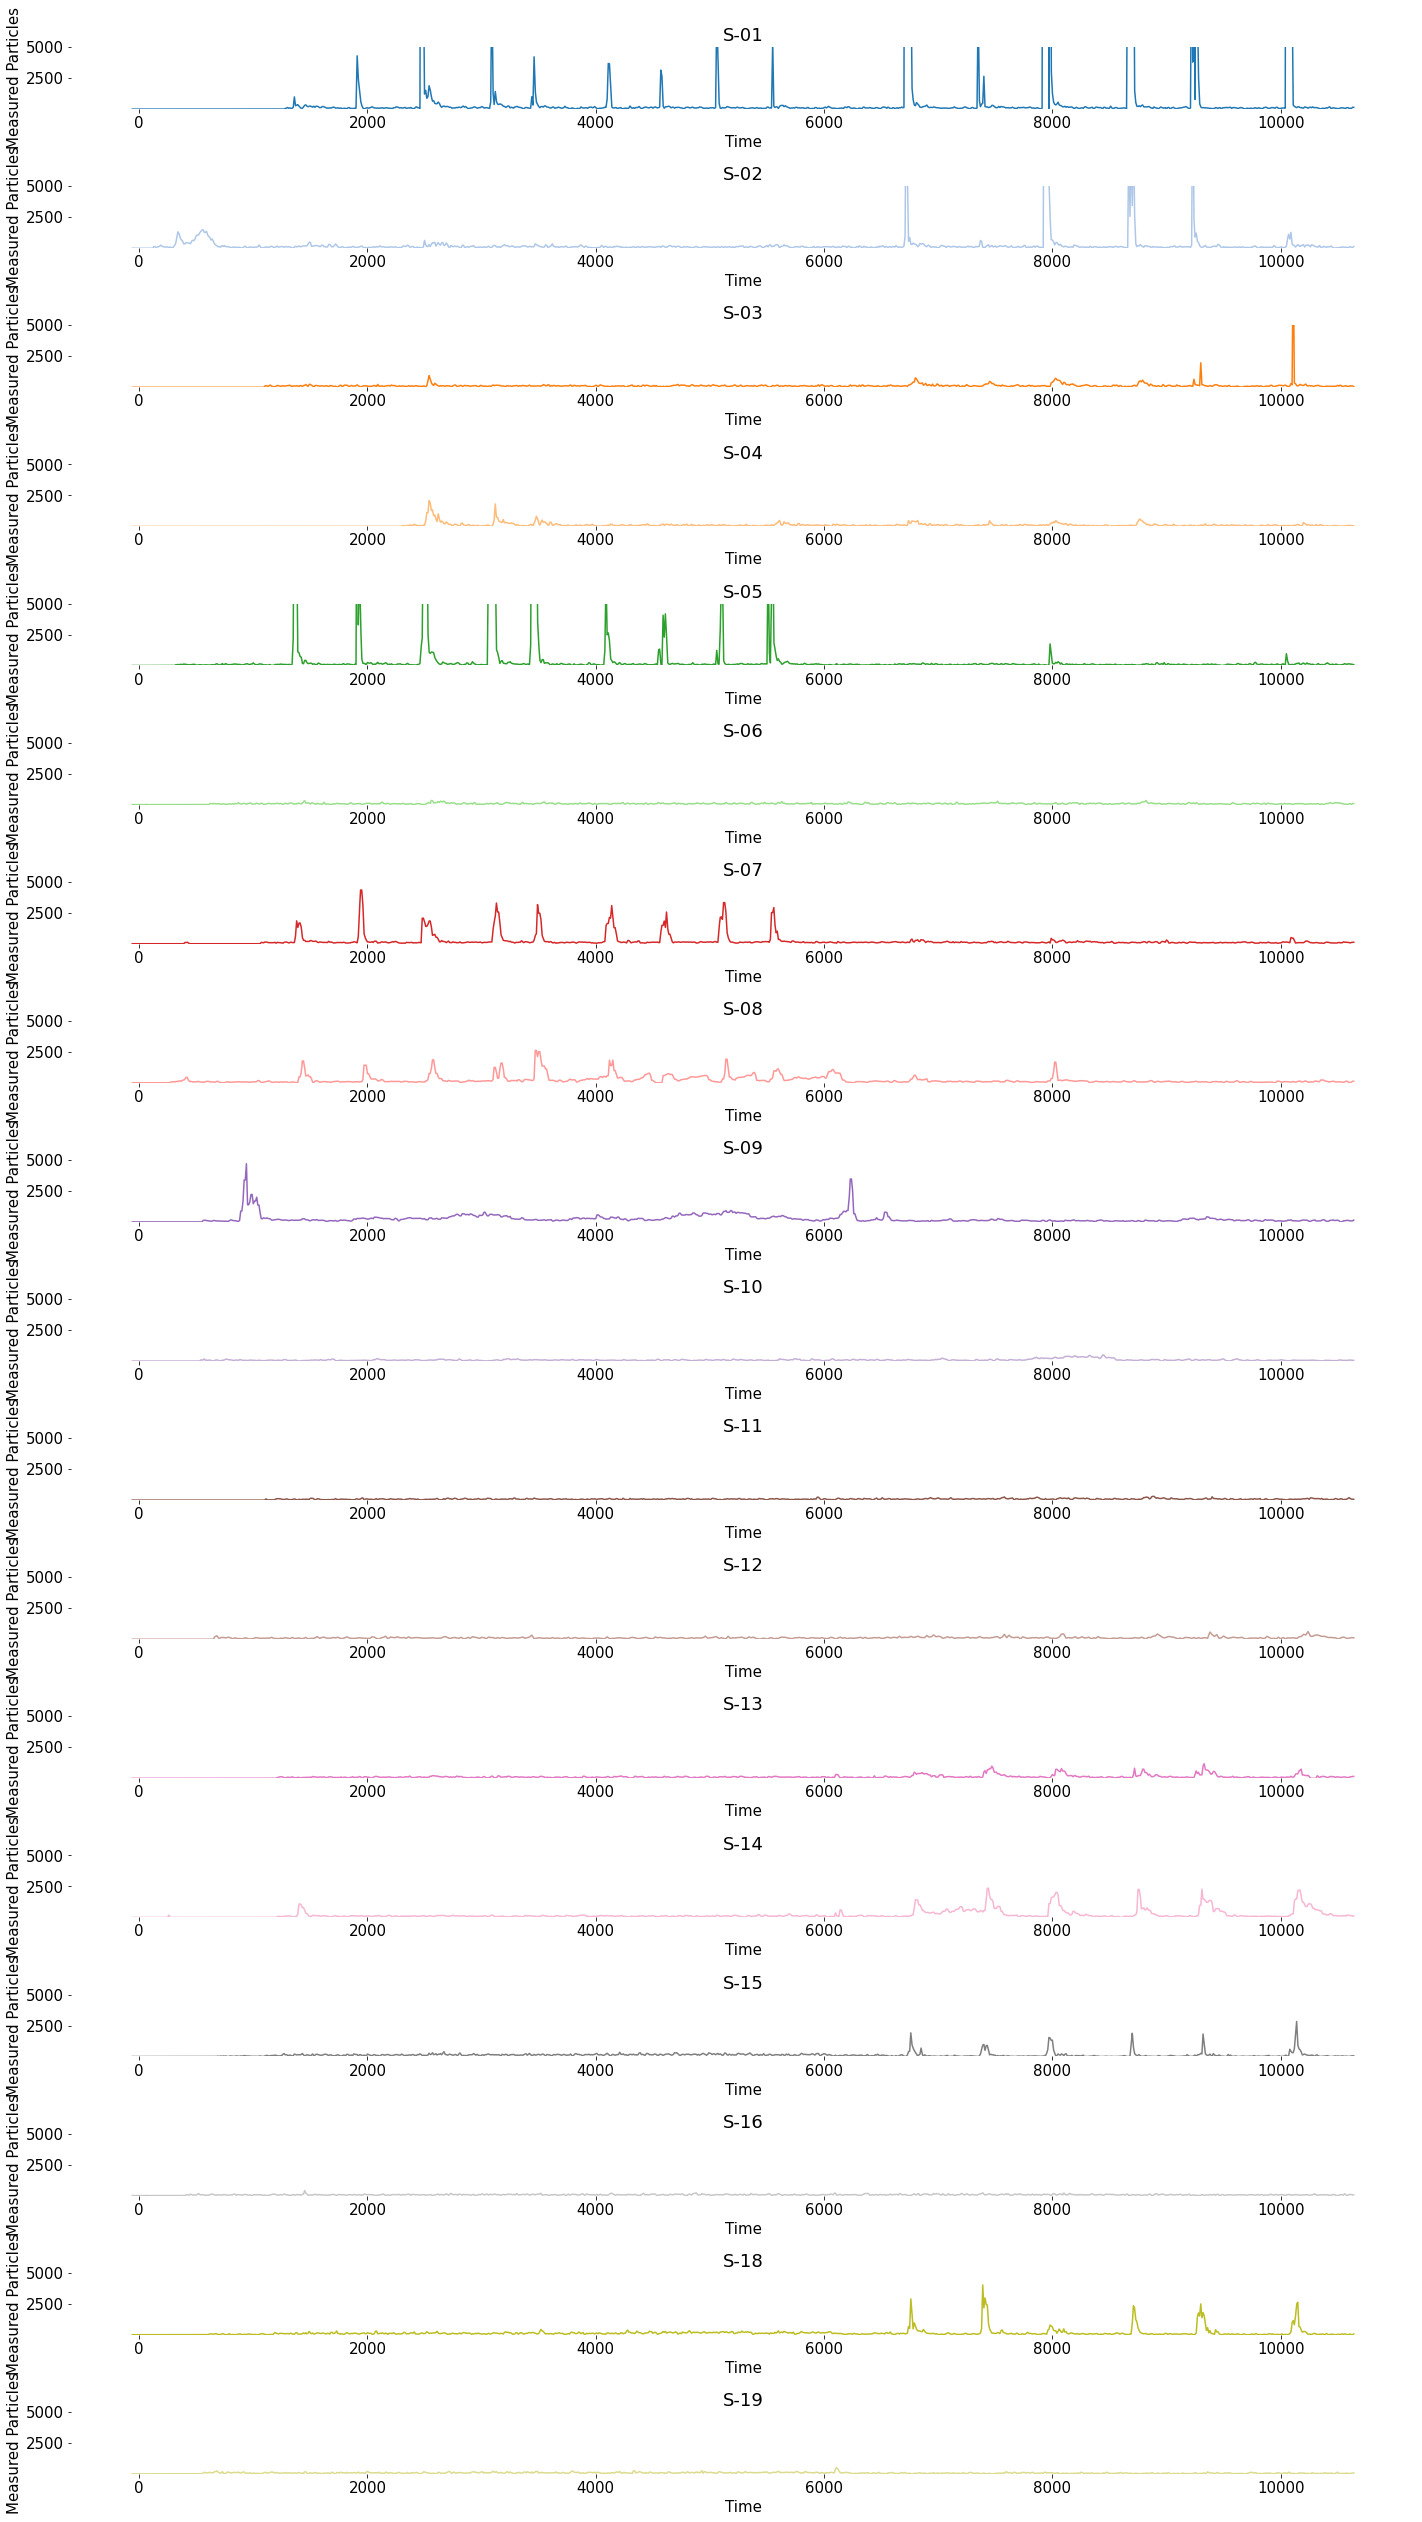

In [98]:

fig,sPlt=plt.subplots(18,sharex=False,sharey=False,figsize=(20,35))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    yData = (DataFrame[sensor])
    xData = [i for i in range(-60,len(yData)-60)]

    sPlt[idx].plot(xData,yData,color = color[idx],label = sensor)

    sPlt[idx].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[idx].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[idx].set(title=sensor,xlabel='Time',ylabel='Measured Particles')



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    # ax.legend(prop={'size':9})
    ax.set_ylim([1,5000])
    # ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


### Zones Plotted Showing Sensor

In [99]:
InteriorSensors

{'S-01': [3.5, 5],
 'S-02': [2, 5],
 'S-03': [3.5, 6.5],
 'S-04': [3.5, 5.1],
 'S-05': [3.5, 3.5],
 'S-06': [5, 5],
 'S-07': [1, 9.9],
 'S-08': [1, 10],
 'S-09': [9.9, 10],
 'S-10': [10, 10],
 'S-11': [10, 1.1],
 'S-12': [10, 1],
 'S-13': [1, 1.1],
 'S-15': [1, 1]}

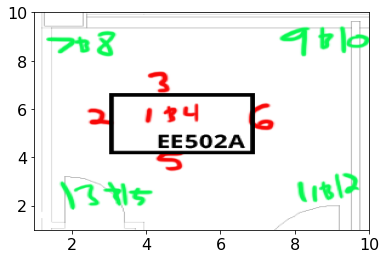

In [100]:
img = mpimg.imread("./Graphs, Images, and Animations/ICU1.png")
imgplot = plt.imshow(img, aspect='auto', extent=(1,10,1,10), alpha=1, zorder=-1)

### Check the Spatial Zoning distribution

In [101]:
if re.match('EE502',key):
    print('match')
else:
    print('no match')

no match


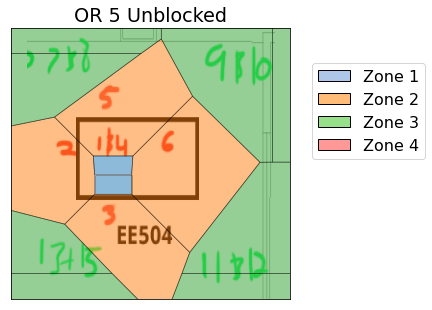

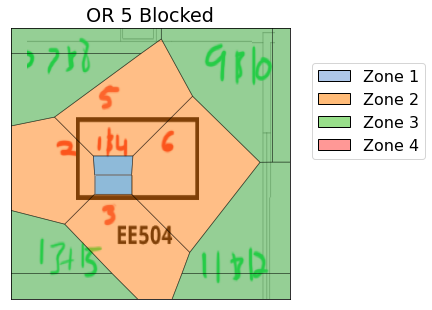

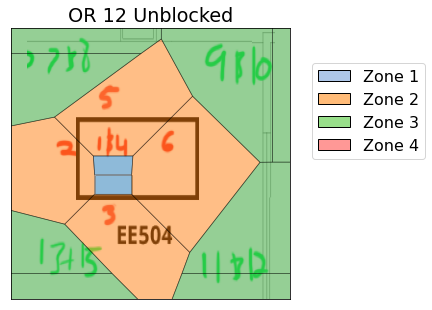

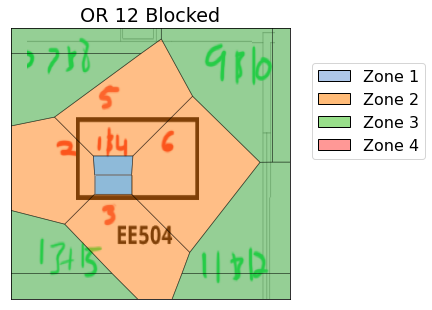

In [102]:
# ZoneAssignments.keys()
ISC = InteriorSensors
# fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(10,10))
for iteration,key in enumerate(ZoneAssignments.keys()):
    x=[]
    y=[]
    points = []
    for idx,sensor in enumerate(InteriorSensors):
        points.append(ISC[sensor])
    vor = Voronoi(points)
    regions, vertices = voronoi_finite_polygons_2d(vor)
    polygons = []
    for reg in regions:
        polygon = vertices[reg]
        polygons.append(polygon)

    plt.figure(figsize=(5,5))
    if re.match('EE502',key):
        route = './Graphs, Images, and Animations/ICU1.png'
    else:
        route = './Graphs, Images, and Animations/ICU2.png'
    img = mpimg.imread(route)
    plt.imshow(img, aspect='auto', extent=(0,10,0,11), alpha=1, zorder=-1)
    ax = plt.subplot(111)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    ax.axis("equal")

    # Set limits
    ax.set_xlim(0,10)
    ax.set_ylim(0,11)

    # Add polygons 
    for idx,poly in enumerate(polygons):
        colored_cell = Polygon(poly,linewidth=0.7, alpha=0.5,facecolor=color[ZoneAssignments[key][idx]*2],edgecolor="black")
        ax.add_patch(colored_cell)
    plt.title(key)
    # got lazy here and explicitly defined the zones
    legend_elements = [Patch(facecolor=color[1], edgecolor='black',label='Zone 1'),
                       Patch(facecolor=color[3], edgecolor='black',label='Zone 2'),
                       Patch(facecolor=color[5], edgecolor='black',label='Zone 3'),
                       Patch(facecolor=color[7], edgecolor='black',label='Zone 4'),]
    plt.legend(handles = legend_elements,bbox_to_anchor=(1.05, .9))
    plt.show()
    # voronoi_plot_2d(vor)
        # sPlt[iteration%2][0 if iteration < 2 else 1].plot(X,Y,'o',color = C,mew = 10)


    


In [103]:
mergedData

Date_Time   S-01   S-02  S-03  S-04  S-05  S-06   S-07   S-08  \
0     2021-04-19 17:00:00    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1     2021-04-19 17:00:01    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2     2021-04-19 17:00:02    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3     2021-04-19 17:00:03    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4     2021-04-19 17:00:04    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
...                   ...    ...    ...   ...   ...   ...   ...    ...    ...   
10696 2021-04-19 19:58:16  147.6  104.4  85.2  49.2  73.2  87.6  113.4  129.0   
10697 2021-04-19 19:58:17  146.7  112.8  80.4  47.4  71.4  88.2  114.3  129.0   
10698 2021-04-19 19:58:18  145.8  121.2  75.6  45.6  69.6  88.8  115.2  129.0   
10699 2021-04-19 19:58:19  144.9  129.6  70.8  43.8  67.8  89.4  116.1  129.0   
10700 2021-04-19 19:58:20  144.0  138.0  66.0  42.0  66.0  90.0  117.0  129.0   

        S-09  ...  S-11   S-12   S-13   S-14  S-15  S-16  S-18  S-19  \
0        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
1        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
2        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
3        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
4        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
...      ...  ...   ...    ...    ...    ...   ...   ...   ...   ...   
10696  121.6  ...  70.8  116.8  152.8  104.4  54.6  63.6  37.8  66.0   
10697  128.7  ...  69.1  116.1  152.1  100.8  53.7  65.7  44.1  69.0   
10698  135.8  ...  67.4  115.4  151.4   97.2  52.8  67.8  50.4  72.0   
10699  142.9  ...  65.7  114.7  150.7   93.6  51.9  69.9  56.7  75.0   
10700  150.0  ...  64.0  114.0  150.0   90.0  51.0  72.0  63.0  78.0   

         Average     Variance  
0       0.000000     0.000000  
1       0.000000     0.000000  
2       0.000000     0.000000  
3       0.000000     0.000000  
4       0.000000     0.000000  
...          ...          ...  
10696  90.500000  1430.787037  
10697  91.138889  1398.770062  
10698  91.777778  1366.753086  
10699  92.416667  1334.736111  
10700  93.055556  1302.719136  

[10701 rows x 21 columns]

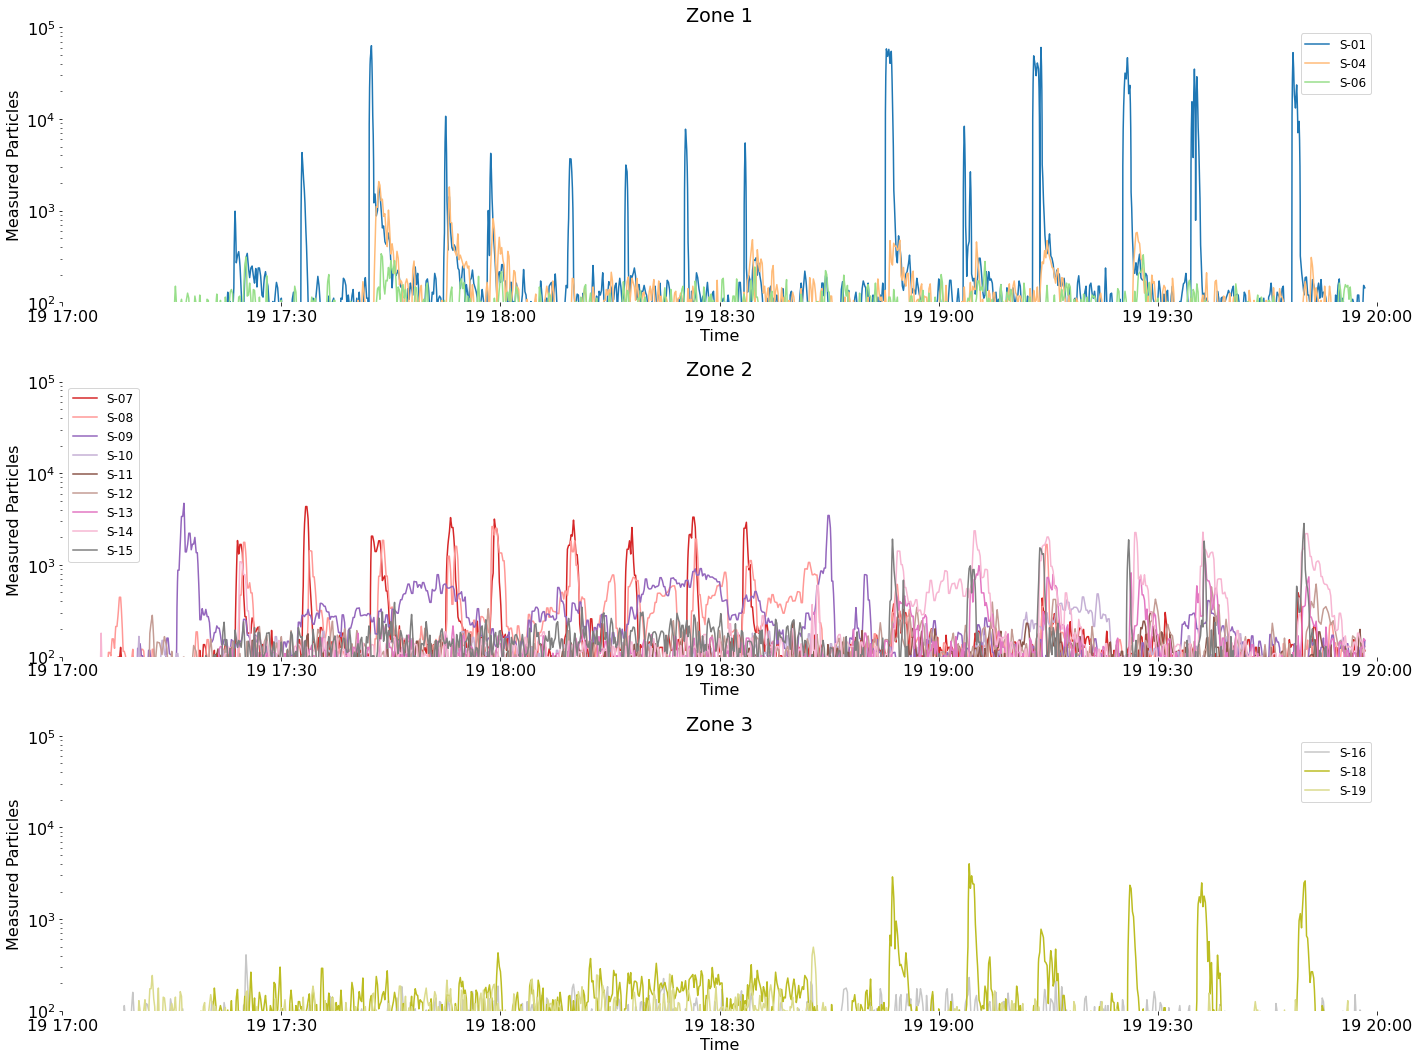

In [104]:

fig,sPlt=plt.subplots(3,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = mergedData

for idx,sensor in enumerate(DataFrame.columns[1:19]):
    if sensor in ['S-02','S-03','S-05']:
        continue
    if idx < 6:
        num = 0
    elif idx < 15:
        num = 1
    else:
        num = 2

    yData = DataFrame[sensor]
    xData = DataFrame["Date_Time"]

    sPlt[num].plot(xData,yData,color = color[idx],label = sensor)

for i in range(3):

    sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sensor = ['Zone 1','Zone 2','Zone 3']
    sPlt[i].set(title=sensor[i],xlabel='Time',ylabel='Measured Particles')
    
    # yData = DataFrame[DataFrame.keys()[21+i*2]]
    # xData = DataFrame["Date_Time"]
    # sPlt[i].plot(xData,yData,color = "Black",label = "Average",linewidth=2)
    # sPlt[i].grid(color='black', linestyle='--', linewidth=.1)



for ax in sPlt:
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False) 
    ax.legend(prop={'size':12})
    # ax.legend(loc="upper right")
    ax.set_ylim([100,10**5])
    ax.set_xlim([pd.Timestamp('4/19/2021 17:00:00'),pd.Timestamp('4/19/2021 20:00:00')])
    ax.set_yscale("log")

    
    
plt.tight_layout()
plt.rcParams.update({'font.size':16})


## Plots of Avg Zone reading with Avg sensor reading

In [105]:
# stExpDf[key + ' Exp '+str(i)]#[sensors[idx]]
# numExps
# [i for i,s in enumerate(stExpDf.keys()) if key in s]
# stExpDf.keys()

In [106]:
len(set(ZoneAssignments.iloc[:,1]))

5

In [107]:
idx

17

In [108]:
DataFrame.keys()

Index(['Date_Time', 'S-01', 'S-02', 'S-03', 'S-04', 'S-05', 'S-06', 'S-07',
       'S-08', 'S-09', 'S-10', 'S-11', 'S-12', 'S-13', 'S-14', 'S-15', 'S-16',
       'S-18', 'S-19', 'Average', 'Variance'],
      dtype='object')

In [109]:
idx

17

In [110]:
ZoneAssignments

OR 5 Unblocked  OR 5 Blocked  OR 12 Unblocked  OR 12 Blocked
0                0             0                0              0
1                1             1                1              1
2                1             1                1              1
3                0             0                0              0
4                1             1                1              1
5                1             1                1              1
6                2             2                2              2
7                2             2                2              2
8                2             2                2              2
9                2             2                2              2
10               2             2                2              2
11               2             2                2              2
12               2             2                2              2
13               2             2                2              2
14               3             3                3              3
15               0             0                0              0
16               3             3                3              3
17               4             4                4              4

In [111]:
DataFrame

Date_Time   S-01   S-02  S-03  S-04  S-05  S-06   S-07   S-08  \
0     2021-04-19 17:00:00    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
1     2021-04-19 17:00:01    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
2     2021-04-19 17:00:02    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
3     2021-04-19 17:00:03    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
4     2021-04-19 17:00:04    0.0    0.0   0.0   0.0   0.0   0.0    0.0    0.0   
...                   ...    ...    ...   ...   ...   ...   ...    ...    ...   
10696 2021-04-19 19:58:16  147.6  104.4  85.2  49.2  73.2  87.6  113.4  129.0   
10697 2021-04-19 19:58:17  146.7  112.8  80.4  47.4  71.4  88.2  114.3  129.0   
10698 2021-04-19 19:58:18  145.8  121.2  75.6  45.6  69.6  88.8  115.2  129.0   
10699 2021-04-19 19:58:19  144.9  129.6  70.8  43.8  67.8  89.4  116.1  129.0   
10700 2021-04-19 19:58:20  144.0  138.0  66.0  42.0  66.0  90.0  117.0  129.0   

        S-09  ...  S-11   S-12   S-13   S-14  S-15  S-16  S-18  S-19  \
0        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
1        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
2        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
3        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
4        0.0  ...   0.0    0.0    0.0    0.0   0.0   0.0   0.0   0.0   
...      ...  ...   ...    ...    ...    ...   ...   ...   ...   ...   
10696  121.6  ...  70.8  116.8  152.8  104.4  54.6  63.6  37.8  66.0   
10697  128.7  ...  69.1  116.1  152.1  100.8  53.7  65.7  44.1  69.0   
10698  135.8  ...  67.4  115.4  151.4   97.2  52.8  67.8  50.4  72.0   
10699  142.9  ...  65.7  114.7  150.7   93.6  51.9  69.9  56.7  75.0   
10700  150.0  ...  64.0  114.0  150.0   90.0  51.0  72.0  63.0  78.0   

         Average     Variance  
0       0.000000     0.000000  
1       0.000000     0.000000  
2       0.000000     0.000000  
3       0.000000     0.000000  
4       0.000000     0.000000  
...          ...          ...  
10696  90.500000  1430.787037  
10697  91.138889  1398.770062  
10698  91.777778  1366.753086  
10699  92.416667  1334.736111  
10700  93.055556  1302.719136  

[10701 rows x 21 columns]

In [112]:
trails = list(stExpDf.keys())
expirements = list(stAvgDf.keys())
[i for i in trails if expirements[0] in i]



['OR 12 Blocked Exp 1', 'OR 12 Blocked Exp 2', 'OR 12 Blocked Exp 3']

In [113]:
ZoneAssignments

OR 5 Unblocked  OR 5 Blocked  OR 12 Unblocked  OR 12 Blocked
0                0             0                0              0
1                1             1                1              1
2                1             1                1              1
3                0             0                0              0
4                1             1                1              1
5                1             1                1              1
6                2             2                2              2
7                2             2                2              2
8                2             2                2              2
9                2             2                2              2
10               2             2                2              2
11               2             2                2              2
12               2             2                2              2
13               2             2                2              2
14               3             3                3              3
15               0             0                0              0
16               3             3                3              3
17               4             4                4              4

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


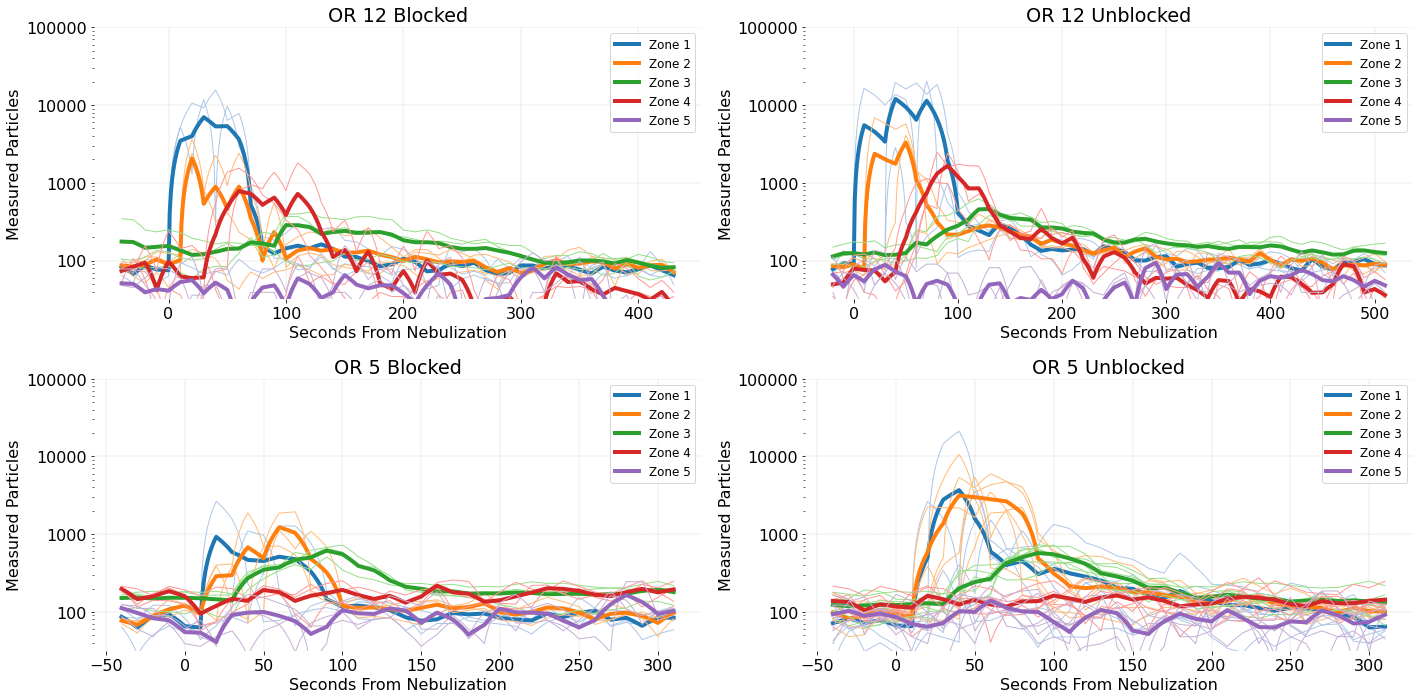

In [128]:

size = len(stAvgDf)
fig,sPlt=plt.subplots(int(size/2),int(size/2),sharex=False,sharey=False,figsize=(20,2.5*size))
#fig.suptitle("March 22nd Data",fontsize=30)
numZones = len(set(ZoneAssignments.iloc[:,1]))

zones = ['Zone '+str(i+1) for i in range(numZones)]
trails = list(stExpDf.keys())
zoneFrame = {}
for iteration,key in enumerate(stAvgDf):
    # fig.delaxes(sPlt[1,1])

    DataFrame = stAvgDf[key]
    sensors = list(DataFrame.keys())[:(-2-numZones+1)]
    numExps = len([i for i,s in enumerate(stExpDf.keys()) if key in s])
    zoneFrame[key] = {}
    # creates a zoneFrame, which is a dictionary that will store of the sensor data for each zone for individual sensor plots
    for zone in range(numZones):
        zoneFrame[key][zone] = pd.DataFrame()

    for idx,zone in enumerate(ZoneAssignments[key]):
        for i in range(numExps):
            # print(idx)
            yData = stExpDf[key + ' Exp '+str(i+1)][sensors[idx]]
            zoneFrame[key][zone][sensors[idx] + ' Exp ' + str(i)] = yData


    for idx in range(numZones):
        # sPlt[i].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
        # sPlt[i].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 

        for trail in [i for i in trails if key in i]:
            # print([0 if iteration < 1 else 1],[iteration%2])
            # print(trail,idx)
            yExpData = stExpDf[trail][zones[idx]]
            xExpData = [i for i in range(-40,len(yData)-40)]
            if re.match('OR 12 Unblocked',key):
                xExpData = [i for i in range(-20,len(yData)-20)]
            sPlt[0 if iteration < 2 else 1][iteration%2].plot(xExpData,yExpData,color = color[idx*2+1],linewidth=1)

        yData = DataFrame[zones[idx]]
        yError = np.var(zoneFrame[key][idx],axis = 1)**.5
        xData = [i for i in range(-40,len(yData)-40)]
        if re.match('OR 12 Unblocked',key):
            xData = [i for i in range(-20,len(yData)-20)]

        # sPlt[iteration].errorbar(xData,yData,yerr=yError,ecolor = color[idx*2+1],color = color[idx*2],label = zones[idx],linewidth=4)

        sPlt[0 if iteration < 2 else 1][iteration%2].plot(xData,yData,color = color[idx*2],label = zones[idx],linewidth=4)

    sPlt[0 if iteration < 2 else 1][iteration%2].grid(color='black', linestyle='--', linewidth=.1)
    sPlt[0 if iteration < 2 else 1][iteration%2].set(title=key,xlabel='Seconds From Nebulization',ylabel='Measured Particles')


    for el in sPlt:
        for ax in el:
            ax.spines["top"].set_visible(False)   
            ax.spines["bottom"].set_visible(False)    
            ax.spines["right"].set_visible(False)    
            ax.spines["left"].set_visible(False) 
            ax.legend(prop={'size':12})
            # ax.legend(loc="upper right")
            ax.set_ylim([10**1.5,10**5])
            # ax.set_xlim([pd.Timestamp(startTime),pd.Timestamp(endTime)])
            ax.set_yscale("log")
            ax.yaxis.set_major_formatter(ScalarFormatter())
    # break
        
        
plt.tight_layout()
plt.rcParams.update({'font.size':16})
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Quad_4-19.png")
    # break
# mpld3.save_html(fig,'ZonedVariances.html')



In [115]:
zoneTracker={}
for key in ZoneAssignments:
    for idx,zone in enumerate(ZoneAssignments[key]):
        print(sensors[idx],zone)

S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-14 2
S-15 3
S-16 0
S-18 3
S-19 4
S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-14 2
S-15 3
S-16 0
S-18 3
S-19 4
S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-14 2
S-15 3
S-16 0
S-18 3
S-19 4
S-01 0
S-02 1
S-03 1
S-04 0
S-05 1
S-06 1
S-07 2
S-08 2
S-09 2
S-10 2
S-11 2
S-12 2
S-13 2
S-14 2
S-15 3
S-16 0
S-18 3
S-19 4


<AxesSubplot:>

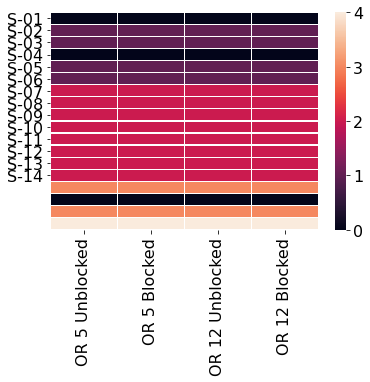

In [116]:
sns.heatmap(ZoneAssignments,yticklabels = sensors[:-5],label='x-small',linecolor='white',linewidths=.25)

In [117]:
indexList = {}
thresh = 2
for notUse,x in enumerate(stAvgDf):
    switch = 1
    for idx,i in enumerate(np.log(stAvgDf[x]['Average'])/np.log(10)):
        if i <= thresh:
            if not switch:
                indexList[x] = idx-120
                switch = 1
                # print(stAvgDf[x]['Average'][idx])
        else:
            switch = 0
    if not switch:
        indexList[x] = idx-120
    print(indexList[x],'seconds',x)

188 seconds OR 12 Blocked
401 seconds OR 12 Unblocked
230 seconds OR 5 Blocked
230 seconds OR 5 Unblocked


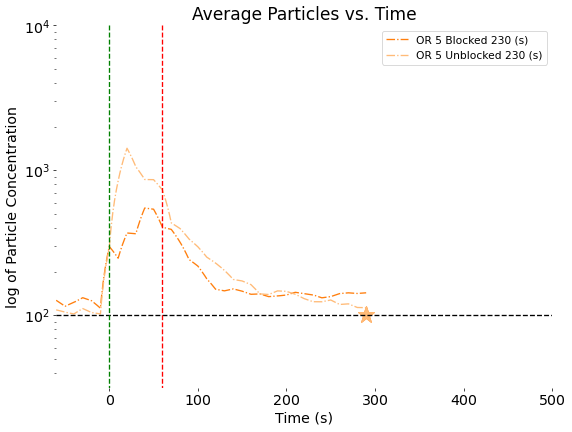

In [118]:
for idx,x in enumerate(stAvgDf):
    if re.match("OR 12",x):
        continue
    fig = plt.figure(0, figsize=(10,7.5), dpi=64)
    ax = fig.gca()
    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    ax.plot([i for i in range(-60,len(yData)-60)],yData,'-.',color = color[idx],label = x + ' ' + str(xData) + ' (s)')

    ax.plot([xData+60],[10**thresh],'*',ms=20,color = color[idx])
    # ax.plot([xData,cData],[0,5])

    # ax.plot([i for i in range(-60,len(yData)-60)],yData,'.')
    # ax.plot([xData,xData],[0,200])

# ax.plot([-60,len(yData)-60],[thresh**3,thresh**3],color = 'white')

## plotting lines here
ax.plot([-60,875],[10**thresh]*2,'--',color = 'black')
ax.plot([0,0],[10**4,1],'--',color = 'green')
ax.plot([60,60],[10**4,1],'--',color = 'red')

plt.yscale("log")

plt.xlim([-60,500])
plt.ylim([10**1.5,10**4])

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time')
ax.spines["top"].set_visible(False)   
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.legend(prop={'size':12})
plt.rcParams.update({'font.size':15})
ax.fill_between([0,60], [1,3], [1,3],facecolor='green',where=True, alpha=0.5)
plt.savefig(r"C:\Users\RobertRochlin\Documents\UW\covidDataProject\finalImages\Avg_OR5_4-19.png")
# #For exporting
# mpld3.save_html(fig,'avgParticlePlot27_Thresh.html')

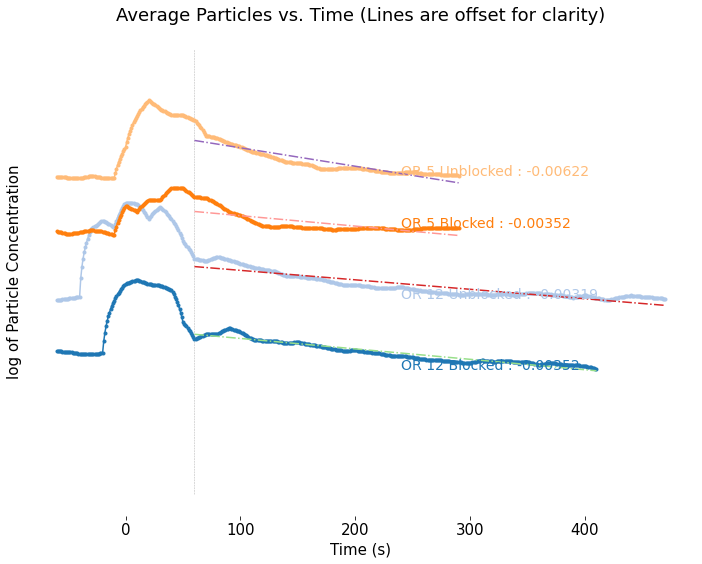

In [119]:
fig = plt.figure(0,figsize=(12,9))
ax = plt.subplot(111)   
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().set_ticks([]) 
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
ax.set_xlabel('Time (s)')
ax.set_ylabel('log of Particle Concentration')
plt.title('Average Particles vs. Time (Lines are offset for clarity)')
plt.plot([60,60], [0,15], "--", lw=0.5, color="black", alpha=0.3)  
spaceFactor = 2

for idx,x in enumerate(stAvgDf):

    yData = stAvgDf[x]['Average']
    xData = indexList[x]

    yPoints = np.log(stAvgDf[x]['Average'][120:])
    xPoints = np.array([i+60 for i in range(len(yPoints))])
    m,b = np.polyfit(xPoints,yPoints,1)
    
    ax.plot([i for i in range(-60,len(yData)-60)],np.log(yData)+idx*spaceFactor,'.-',color = tableau20[idx],label = x + ': Coefficient  ' + str(round(m,3)) )

    ax.plot(xPoints,m*xPoints+b+idx*spaceFactor,'-.',color = tableau20[idx+5])
    y_pos = yPoints.values[-1] + idx*spaceFactor
    plt.text(240, y_pos, x + ' : '+str(round(m,5)), fontsize=14, color=tableau20[idx])    

# # #For Exporting
# mpld3.save_html(fig,'ParticleCountsWithFit.html')


### Plotting Data for Sensors

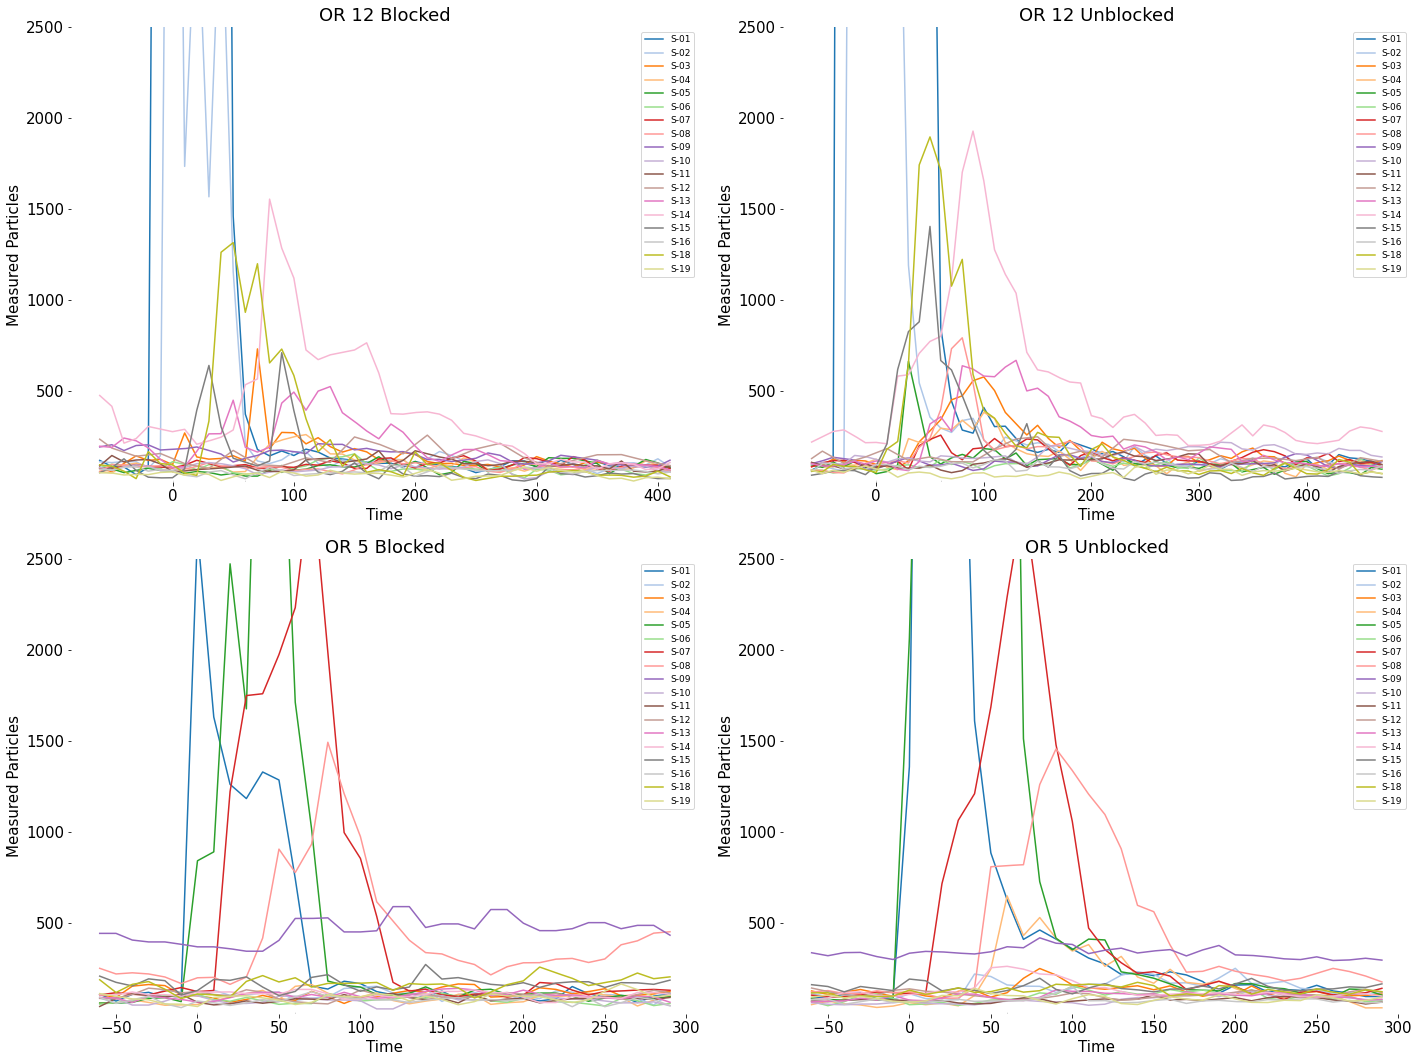

In [120]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))
# fig.delaxes(sPlt[1,1])
DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[:18]):
        # if zone == 'S-13':
        #     continue
        yData = (DataFrame[x][zone])
        xData = [i for i in range(-60,len(yData)-60)]

        sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)

    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='Measured Particles')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(prop={'size':9})
        ax.set_ylim([1,2500])


plt.tight_layout()
plt.rcParams.update({'font.size':22})


### Plotting Data for Zones

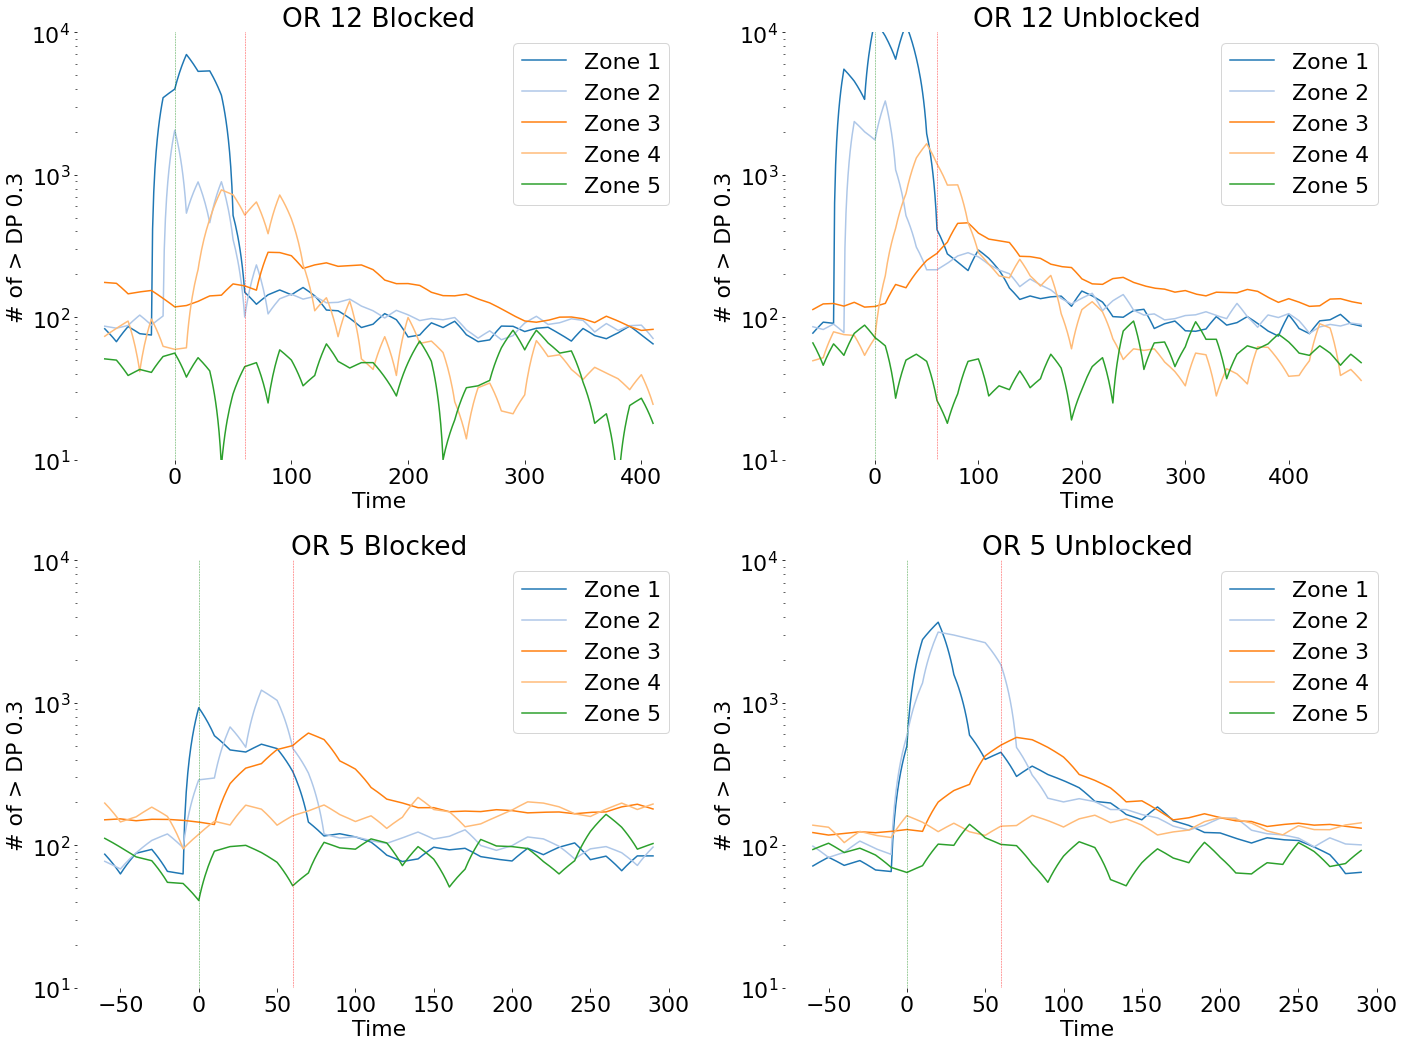

In [121]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stAvgDf
for idx,x in enumerate(DataFrame):
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
        # if True: 

        if re.match(r"Zone",zone):

            yData = (DataFrame[x][zone])
            xData = [i for i in range(-60,len(yData)-60)]

            sPlt[1 if idx > 1 else 0][idx%2].plot(xData,yData,color = color[loop],label = zone)
            
    sPlt[1 if idx > 1 else 0][idx%2].plot([60,60], [1,10**4.5], "--", lw=0.5, color="red", alpha=0.75)
    sPlt[1 if idx > 1 else 0][idx%2].plot([0,0], [1,10**4.5], "--", lw=0.5, color="green", alpha=0.75) 
    sPlt[1 if idx > 1 else 0][idx%2].set(title=x,xlabel='Time',ylabel='# of > DP 0.3')


for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend()
        ax.set_yscale('log')
        ax.set_ylim([10,10**4])

# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})





In [122]:
DataFrame[x].columns[18:]

Index(['Average', 'Variance', 'Zone 1', 'Zone 2', 'Zone 3', 'Zone 4',
       'Zone 5'],
      dtype='object')

In [123]:

fig,sPlt=plt.subplots(2,2,sharex=False,sharey=False,figsize=(20,15))

DataFrame = stExpDf
for idx,x in enumerate(DataFrame):
    index = math.floor(idx/3)
    yData = DataFrame[x]
    xData = [i for i in range(-60,len(yData)-60)]
    for loop,zone in enumerate(DataFrame[x].columns[20:]):
            if not loop%2:
                sPlt[1 if index > 1 else 0][index%2].plot(xData,yData[zone],color = color[loop],label = zone)
`
    sPlt[1 if index > 1 else 0][index%2].plot([60,60], [0,12], "--", lw=0.5, color="black", alpha=0.3)
    sPlt[1 if index > 1 else 0][index%2].plot([0,0], [0,12], "--", lw=0.5, color="black", alpha=0.3) 
    sPlt[1 if index > 1 else 0][index%2].set(title=x,xlabel='Time',ylabel='Measured Particles')

for el in sPlt:
    for ax in el:
        ax.spines["top"].set_visible(False)   
        ax.spines["bottom"].set_visible(False)    
        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False) 
        ax.legend(loc="upper right")
        ax.set_ylim([1,10**3.5])
# sPlt[0][1].set(title='OR7 Blocked',xlabel='Time',ylabel='Log of Particle concentration')
# sPlt[0][0].set(title='OR16 Blocked 1')
plt.tight_layout()
plt.rcParams.update({'font.size':16})


SyntaxError: invalid syntax (<ipython-input-123-b933989f014b>, line 11)